# D MNIST understanding

Some numbers are more difficult to predict with KNN and to cluster with K-means. Show why. Start with examples, and get more general

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import scipy.spatial.distance
from sklearn.metrics import f1_score
import pandas as pd

plt.set_cmap('gray')

## From B:
# load dataset

In [2]:
train = tf.keras.datasets.mnist.load_data()[0]
X_train, Y_train = train[0], train[1]

test = tf.keras.datasets.mnist.load_data()[1]
X_test, Y_test = test[0], test[1]

n_train = X_train.shape[0]
n_test = X_test.shape[0]

m = X_train.shape[1]**2

In [3]:
X_train = X_train.reshape([n_train, m])
X_test = X_test.reshape([n_test, m])

idx = np.random.randint(n_train, size=10000)
x_train_sample = X_train[idx]
y_train_sample = Y_train[idx]

idx = np.random.randint(n_test, size=100)
x_test_sample = X_test[idx]
y_test_sample = Y_test[idx]
#print(idx)
karray = [2, 4, 8]

Function for f1 score

In [4]:
def f1score(k):
    dists = scipy.spatial.distance.cdist(x_train_sample, x_test_sample, metric='euclid')
    idx_nearest = np.argpartition(dists, k, axis = 0)[:k]
    nearest_dists = np.take(x_train_sample, idx)
    
    pred = y_train_sample[idx_nearest]
    pred = np.ndarray.transpose(pred)
    actuals = y_test_sample
    prediction = np.array([])
    
    for row in pred:
        count = np.bincount(row)
        prediction = np.append(prediction, int(np.argmax(count)))
    
    prediction = prediction.astype(int)
    '''We use 1-f1_score since it is an better indicator of quality than the error rate.'''
    calcf1score = f1_score(actuals, prediction, average = 'micro')
    print ("The error rate for KNN with k = {} on this Dataset is {}".format(k, (1 - calcf1score)))
f1score(3)

The error rate for KNN with k = 3 on this Dataset is 0.049000000000000044


In [5]:
results = []
def endresult():
    for k in karray:
        result_array = []
        dists = scipy.spatial.distance.cdist(x_train_sample, x_test_sample, metric='euclid')
        idx_nearest = np.argpartition(dists, k, axis = 0)[:k]
        nearest_dists = np.take(x_train_sample, idx)
    
        pred = y_train_sample[idx_nearest]
        pred = np.ndarray.transpose(pred)
        actuals = y_test_sample
        prediction = np.array([])

        for row in pred:
            count = np.bincount(row)
            prediction = np.append(prediction, int(np.argmax(count)))
    
        prediction = prediction.astype(int)
        '''We use 1-f1_score since it is an better indicator of quality than the error rate because it considers false
        postives as well as false negatives.'''
        calcf1score = f1_score(actuals, prediction, average = 'micro')
        print ("The error rate for KNN with k = {} on this Dataset is {}".format(k, (1 - calcf1score)))
        
        for i in range(10):
            indices = np.where(actuals == i)
            f1 = 1-(f1_score(actuals[indices], prediction[indices], average = 'micro'))
            result_array.append(f1)
            
        results.append(result_array)
               
endresult()

The error rate for KNN with k = 2 on this Dataset is 0.05900000000000005
The error rate for KNN with k = 4 on this Dataset is 0.05400000000000005
The error rate for KNN with k = 8 on this Dataset is 0.05600000000000005


In [6]:
pd.DataFrame(np.array(results).T, columns=["k = 2", "k = 4", "k = 8"])

,k = 2,k = 4,k = 8
0,0.012048,0.012048,0.012048
1,0.000000,0.000000,0.000000
2,0.103774,0.141509,0.160377
3,0.008772,0.026316,0.043860
4,0.056604,0.066038,0.066038
5,0.098039,0.078431,0.078431
6,0.031250,0.010417,0.010417
7,0.034091,0.045455,0.068182
8,0.123711,0.082474,0.061856
9,0.113208,0.066038,0.047170


- As you can see KNN works best when k is 2. 
- The most mistakes tend to happen on 9s and 8s.

## So let´s further analyse these labels!

The error rate for KNN with k = 2 on this Dataset is 0.05900000000000005
[101, 117, 181, 263, 269, 409, 715, 716, 781, 852, 855, 996]


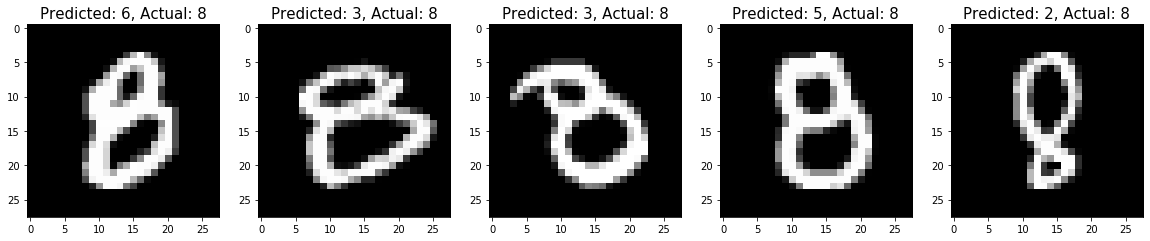

In [92]:
k = 2
dists = scipy.spatial.distance.cdist(x_train_sample, x_test_sample, metric='euclid')
idx_nearest = np.argpartition(dists, k, axis = 0)[:k]
nearest_dists = np.take(x_train_sample, idx)
    
pred = y_train_sample[idx_nearest]
pred = np.ndarray.transpose(pred)
actuals = y_test_sample
prediction = np.array([])
    
for row in pred:
    count = np.bincount(row)
    prediction = np.append(prediction, int(np.argmax(count)))
    
prediction = prediction.astype(int)
'''We use 1-f1_score since it is an better indicator of quality than the error rate.'''
calcf1score = f1_score(actuals, prediction, average = 'micro')
print ("The error rate for KNN with k = {} on this Dataset is {}".format(k, (1 - calcf1score)))


def get_misclassified_8s(predictions):
    index = 0
    misclassifiedIndexes = []
    for label, predict in zip(y_test_sample, predictions):
        if label == 8 and label != predict: 
            misclassifiedIndexes.append(index)
        index +=1
    return misclassifiedIndexes

print(get_misclassified_8s(prediction))

misclassifiedIndexes = get_misclassified_8s(prediction)
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test_sample[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(prediction[badIndex], y_test_sample[badIndex]), fontsize = 15)

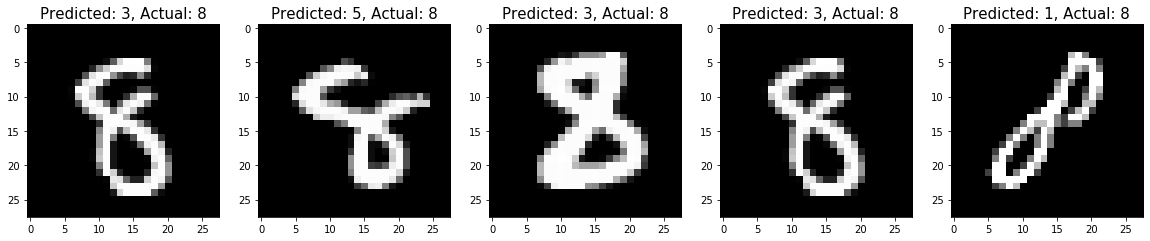

In [93]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[5:10]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test_sample[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(prediction[badIndex], y_test_sample[badIndex]), fontsize = 15)

Some of these are written very strangely so you can imagine how the algorithm can have difficulties here.
Most of the time when KNN is wrong it  predicts the 8s as 3s.
So lets look at this label.

(array([  16,   18,   27, ..., 9939, 9967, 9984], dtype=int64),)


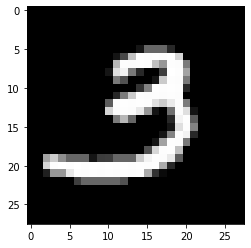

In [71]:
all3s = np.where(y_train_sample == 3) 
print(all3s)

plt.imshow(np.reshape(x_train_sample[9984], (28,28)))

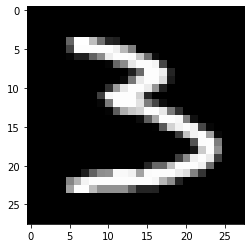

In [72]:
plt.imshow(np.reshape(x_train_sample[9967], (28,28)))

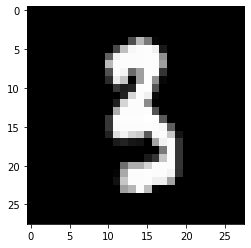

In [73]:
plt.imshow(np.reshape(x_train_sample[27], (28,28)))

You can see how it can be difficult for an algortihm to differentiate between an 8 and a 3 since sometimes there are only a few lines missing from 3 to 8.

In general there are many numbers in the Dataset, that are written in a way that makes them look like they´re from a different label. Since the numbers are stored in a pretty simple way (28*28 vector) mistakes can happen easier:
7s and 1s can look very simialar, as well as 9s and 5s  or 5s and 6s and also as prior said 3s and 8s.
This counts for K-Means as well since it also uses the same distance-calculation to cluster.